<a href="https://colab.research.google.com/github/sultankeles/machineLearning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KNN (K-Nearest Neighbor)

#### Binary Classification

Accuracy: 0.9590643274853801
Confusion Matrix:
[[ 59   4]
 [  3 105]]


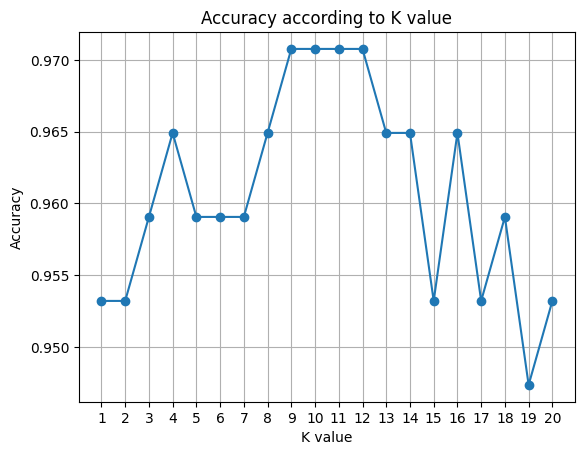

In [10]:
# sklearn: ML Library

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# 1- Dataset Review
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target  # Added target column

# 2- Choosing a machine learning model - (KNN : selected model)

# 3- Training the model
X = cancer.data # features
y = cancer.target # target

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


# Scaling (Preprocessing function)
scaler = StandardScaler() # Scales the dataset
X_train = scaler.fit_transform(X_train) # to scale the parameters - Learn(w/.fit()) and apply(w/ .transform())
X_test = scaler.transform(X_test) # Apply parameters learned from X_train dataset to X_test dataset


# Create and train knn model
knn = KNeighborsClassifier(n_neighbors=3)  # Model building
knn.fit(X_train, y_train) # fit() function trains the knn algorithm using data (samples + target)



# 4- Test / Evaluation
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_matrix) # Number of correct and incorrect predictions


# 5- Hyperparameter tuning
'''
KNN: Hyperparameter = K
    K: Number of neighbors to consider when making a prediction. (1, 2, 3, ...., n)
    Accuracy: %A, %B, %C ...
'''
accuracy_values = []
k_values = []
for k in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_values.append(accuracy) # append: one of the simple list commands(add into)
  k_values.append(k)

plt.figure()
plt.plot(k_values, accuracy_values, marker = 'o', linestyle = '-')
plt.title('Accuracy according to K value')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

#### Regression

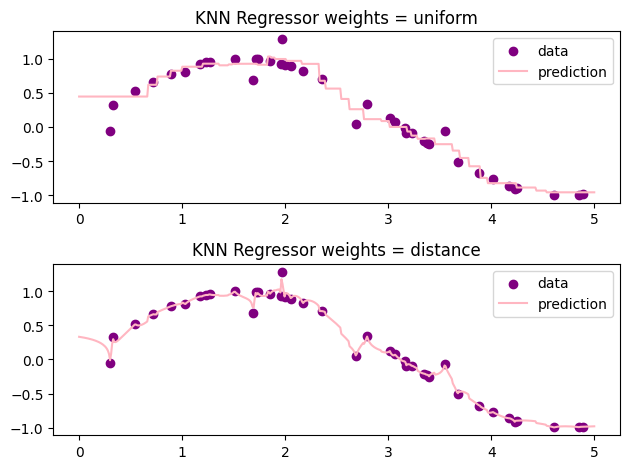

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

X = np.sort(5 * np.random.rand(40, 1), axis = 0) # X: features created with uniform distribution  /  sort: order from largest to smallest or smallest to largest
y = np.sin(X).ravel() # target  /  ravel(): used to contiguous flattened array

# plt.plot(X, y)  # We don't see the gaps with plot() function.
# plt.scatter(X, y)  # scatter(): shows gaps

# Add noise
y[::5] += 1 * (0.5 - np.random.rand(8))

# plt.scatter(X, y) # Random noisy dots interleaved in 5 steps

T = np.linspace(0, 5, 500)[:, np.newaxis] # T: test dataset

for i, weight in enumerate(['uniform', 'distance']):
  knn = KNeighborsRegressor(n_neighbors=5, weights=weight)
  y_pred = knn.fit(X, y).predict(T)

# plt.figure()  # Shows in two different plots
  plt.subplot(2, 1, i+1)  # Shows in a single plot
  plt.scatter(X, y, color = 'purple', label = 'data')
  plt.plot(T, y_pred, color = 'lightpink', label = 'prediction')
  plt.axis('tight')
  plt.legend()  # Makes labels visible
  plt.title('KNN Regressor weights = {}'.format(weight))

plt.tight_layout()
plt.show()

### Decision Tree

#### Classification

##### Practice - 1

Accuracy: 1.0
conf_matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


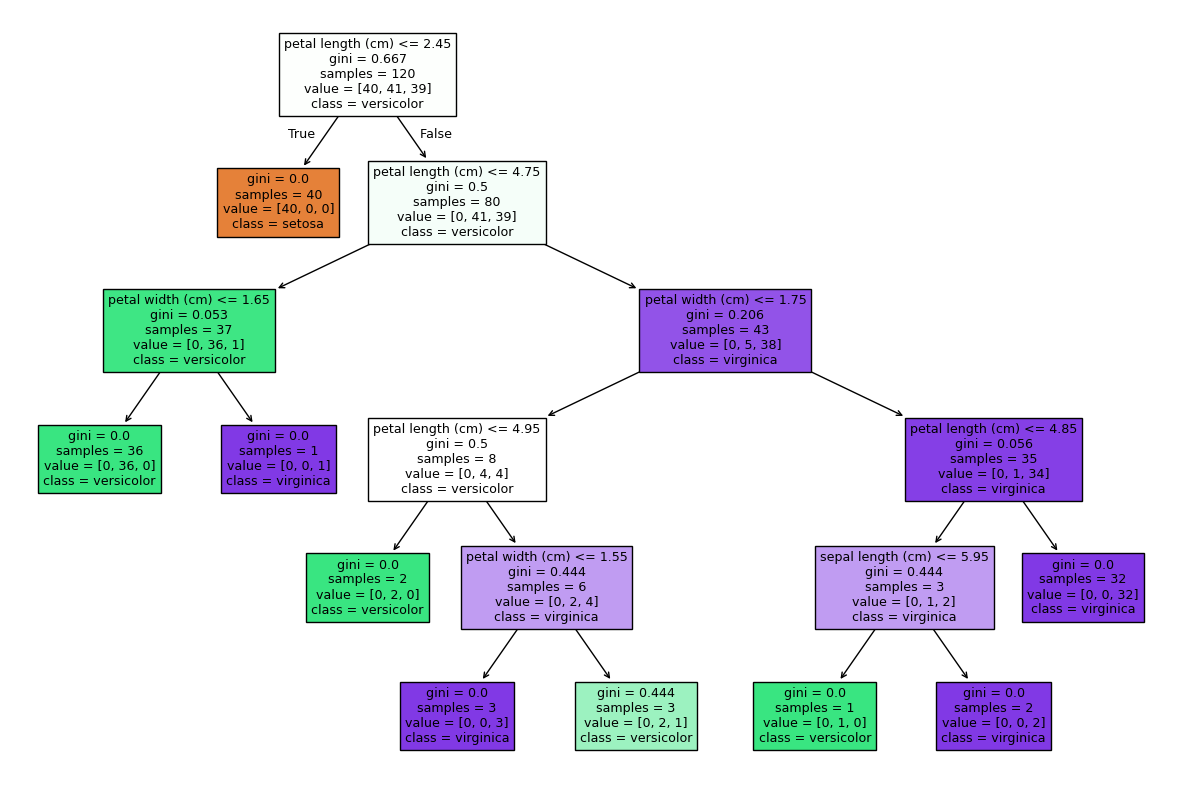

petal length (cm): 0.9045522597319637
petal width (cm): 0.07849499604256478
sepal length (cm): 0.016952744225471498
sepal width (cm): 0.0


In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

# Dataset review
iris = load_iris()

X = iris.data # features
y = iris.target # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# DT model creation and train
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 42) # criterion='entropy'
tree_clf.fit(X_train, y_train)

# DT Evaluation
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print('conf_matrix:')
print(conf_matrix)

plt.figure(figsize = (15, 10))
plot_tree(tree_clf, filled = True, feature_names = iris.feature_names, class_names = list(iris.target_names))
plt.show()

feature_importances = tree_clf.feature_importances_

feature_names = iris.feature_names

feature_importances_sorted = sorted(zip(feature_importances, feature_names), reverse = True)

for importance, feature_name in feature_importances_sorted:
  print(f'{feature_name}: {importance}')



##### Practice - 2

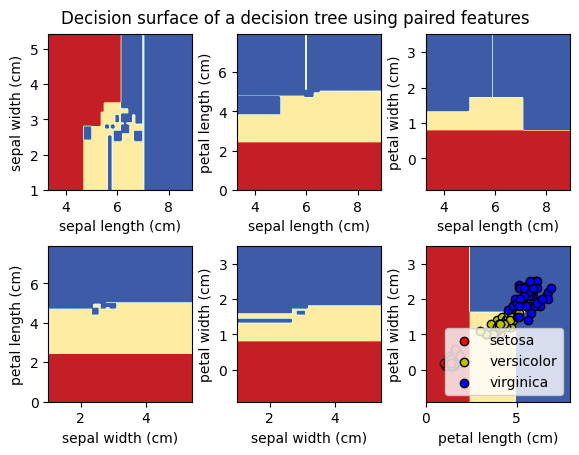

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
import numpy as np

# If you don't want to see warnings:
import warnings
warnings.filterwarnings('ignore')

# Dataset review
iris = load_iris()

n_classes = len(iris.target_names)
plot_colors = 'ryb'

for pairidx, pair in enumerate([[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]):

  X = iris.data[:, pair]  # features
  y = iris.target # target

  clf = DecisionTreeClassifier().fit(X, y)

  ax = plt.subplot(2, 3, pairidx + 1)
  plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
  DecisionBoundaryDisplay.from_estimator(clf,
                                         X,
                                         cmap = plt.cm.RdYlBu,
                                         response_method = 'predict',
                                         ax = ax,
                                         xlabel=iris.feature_names[pair[0]],
                                         ylabel=iris.feature_names[pair[1]])
for i, color in zip(range(n_classes), plot_colors):
  idx = np.where(y == i)
  plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i], cmap = plt.cm.RdYlBu, edgecolors='black')

plt.suptitle('Decision surface of a decision tree using paired features')
plt.legend()
plt.show()



#### Regression

##### Practice - 1

In [14]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import numpy as np

diabetes = load_diabetes()

X = diabetes.data # features
y = diabetes.target # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Decision Tree Regression Model
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(X_train, y_train)

# Prediction
y_pred = tree_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)


MSE: 4976.797752808989
RMSE: 70.54642267903446


##### Practice - 2

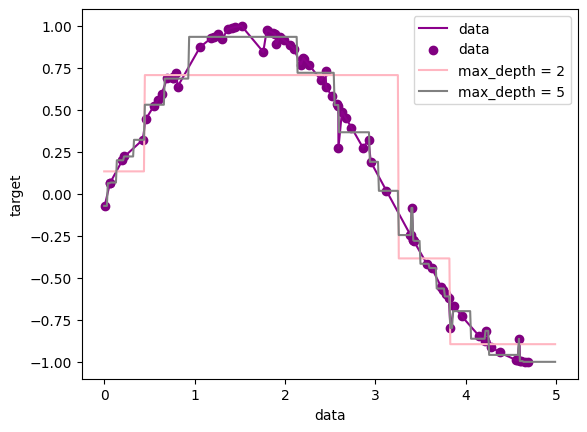

In [15]:
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import matplotlib.pyplot as plt

# Create a dataset
X = np.sort(5* np.random.rand(80, 1), axis = 0)
y = np.sin(X).ravel()
y[::5] += 0.5 * (0.5 - np.random.rand(16))  # Added random noise

#plt.scatter(X, y)

# Building 2 regressors at different depths
regr1 = DecisionTreeRegressor(max_depth = 2)
regr2 = DecisionTreeRegressor(max_depth = 5)

# Train
regr1.fit(X, y)
regr2.fit(X, y)

# Prediction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

plt.figure()
plt.plot(X, y, color = 'darkmagenta', label = 'data')
plt.scatter(X, y, c = 'purple', label = 'data')
plt.plot(X_test, y_pred1, color = 'lightpink', label = 'max_depth = 2')
plt.plot(X_test, y_pred2, color = 'gray', label = 'max_depth = 5')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()

### Random Forest

#### Classification

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


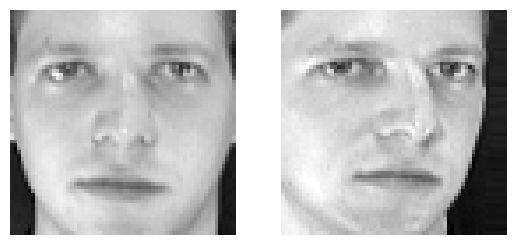

Accuracy: 0.9375


In [16]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

oli = fetch_olivetti_faces()
# 2D (64x64) -> 1D (4096)

plt.figure()
for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(oli.images[i], cmap = 'gray')
  plt.axis('off') # Hided numbers

plt.show()

# Random Forest Classifier
X = oli.data
y = oli.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#### Regression

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import numpy as np

california_housing = fetch_california_housing()

X = california_housing.data
y = california_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rf_reg = RandomForestRegressor(random_state = 42)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 0.5053399773665033


### Logistic Regression

    Although it has regression in its name, this is an algorithm used to solve classification problems.

In [18]:
# https://archive.ics.uci.edu/dataset/45/heart+disease

In [19]:
pip install ucimlrepo

In [20]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pandas as pd

# Hided warnings:
import warnings
warnings.filterwarnings('ignore')


heart_disease = fetch_ucirepo(name='heart disease')

df = pd.DataFrame(data=heart_disease.data.features)
df['target'] = heart_disease.data.targets

# drop missing values
if df.isna().any().any():
    df.dropna(inplace=True)
    print('nan')

X = df.drop(['target'], axis=1).values
y = df.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

log_reg = LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=100)
log_reg.fit(X_train, y_train)

accuracy = log_reg.score(X_test, y_test)
print('LR Accuracy:', accuracy)

nan
LR Accuracy: 0.7333333333333333


### Support Vector Machine (SVM)

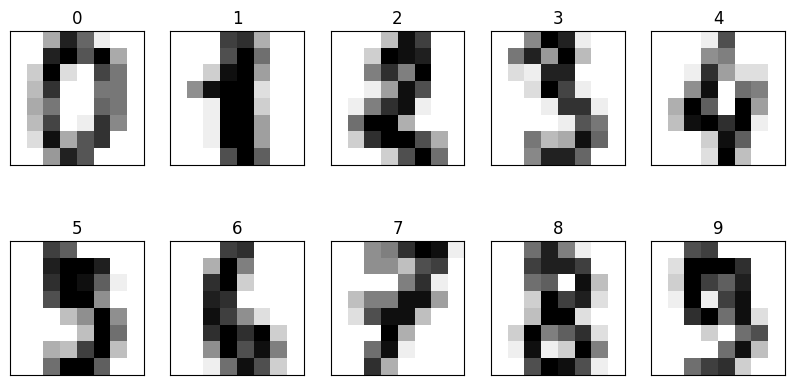

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest')
  ax.set_title(digits.target[i])

plt.show()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

svm_clf = SVC(kernel = 'linear', random_state = 42)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))


### Naive Bayes Classifier

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Comparison of classification models


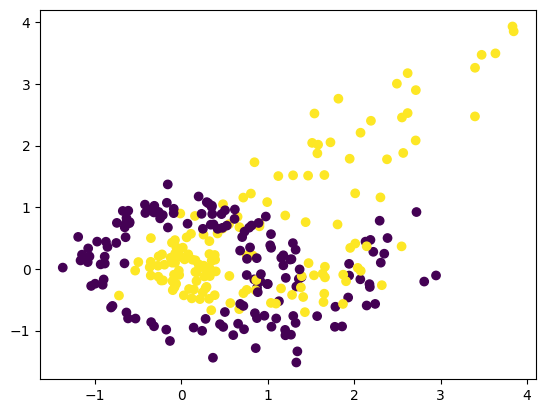

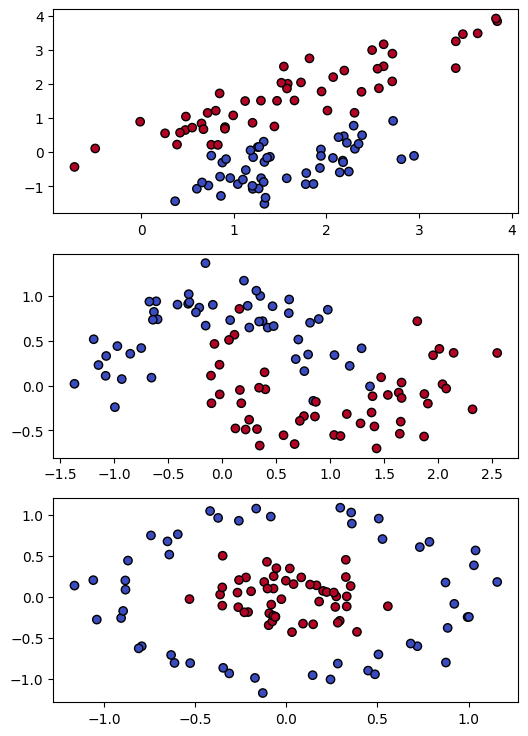

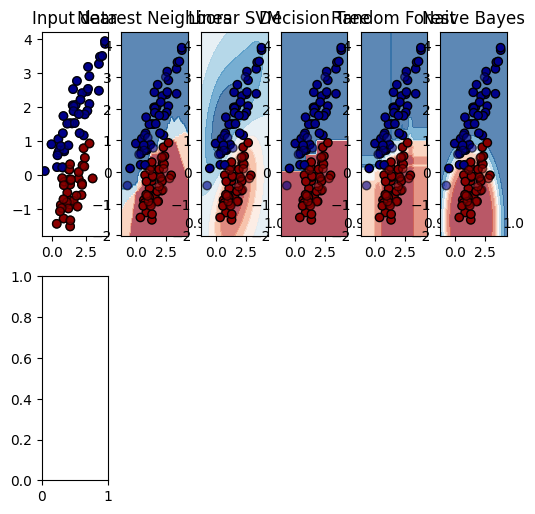

In [23]:
# Creating 3 different datasets

from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay

from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, random_state = 42)  # n_redundant: features are included information   /   n_informative: features are not included information   /   n_clusters_per_class = 1: adjusts the sets so that they do not get into each other
X += 1.2 * np.random.uniform(size = X.shape)
Xy = (X, y)

plt.scatter(X[:, 0], X[:, 1], c = y)

X, y = make_moons(noise = 0.2, random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c = y)

X, y = make_circles(noise = 0.1, factor = 0.3, random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c = y)

datasets = [
            Xy,
            make_moons(noise = 0.2, random_state = 42),
            make_circles(noise = 0.1, factor = 0.3, random_state = 42)]

fig = plt.figure(figsize = (6, 9))
i = 1
for ds_cnt, ds in enumerate(datasets):
  X, y = ds
  if ds_cnt == 0:
    color = 'purple'
  elif ds_cnt == 1:
    color = 'lightpink'
  else:
    color = 'gray'
  ax = plt.subplot(len(datasets), 1, i)
  ax.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm, edgecolors = 'black')
  i += 1

plt.show()


# 5 Classifier identification

names = ['Nearest Neighbors', 'Linear SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']

classifiers = [KNeighborsClassifier(3), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()]

fig = plt.figure(figsize = (6, 9))
i = 1
for ds_cnt, ds in enumerate(datasets):
  X, y = ds
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

  cm_bright = ListedColormap(['darkred', 'darkblue'])
  ax = plt.subplot(len(datasets), len(classifiers)+1, i)
  if ds_cnt == 0:
    ax.set_title('Input data')

    # Plot training data
    ax.scatter(X_train[:, 0 ], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = 'black')

    # Plot test data
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = 'black', alpha = 0.6)

    i += 1

    for name, clf in zip(names, classifiers):
      ax = plt.subplot(len(datasets), len(classifiers)+1, i)

      clf = make_pipeline(StandardScaler(), clf)
      clf.fit(X_train, y_train)
      score = clf.score(X_test, y_test) # accuracy
      DecisionBoundaryDisplay.from_estimator(clf, X, cmap = plt.cm.RdBu, alpha = 0.7, ax = ax, eps = 0.5)

      # Plot training data
      ax.scatter(X_train[:, 0 ], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = 'black')

      # Plot test data
      ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, edgecolors = 'black', alpha = 0.6)

      if ds_cnt == 0:
        ax.set_title(name)
      ax.text(
          X[:, 0].max() + 0.15,
          X[:, 1].min() - 0.25,
          str(score)
      )

      i += 1





### Classification of Titanic Dataset

#### 1- Load and Check Data


In [24]:
import numpy as np  # Linear algebra
import pandas as pd # Data processing

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

import os

train_df = pd.read_csv('train.csv')

train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# Statistical summary of numerical values

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 2- Variable Description

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### 2.1 Univariate Variable Analysis
    Categorical Variable: Survived, Sex, Pclass, Embarked, SibSp and Parch
    Numerical Variable: Fare, Age and PassengerId

###### 2.1.1 Categorical Variable

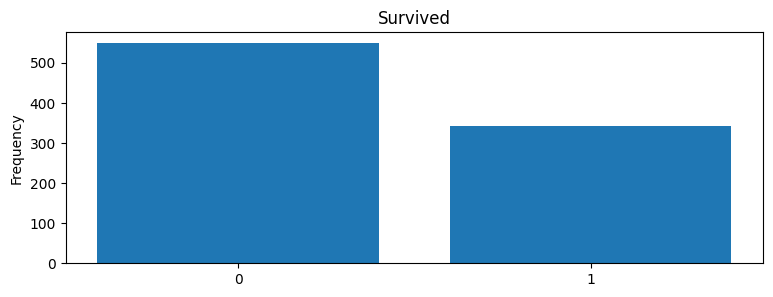

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


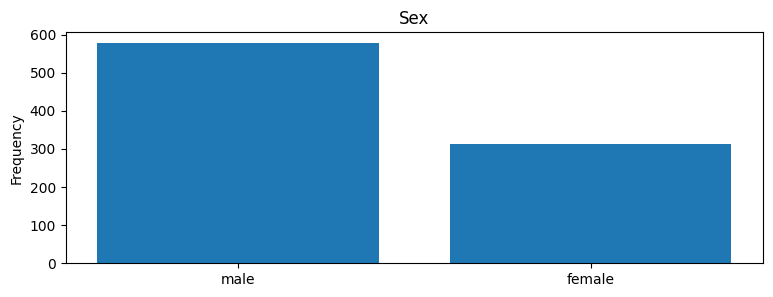

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


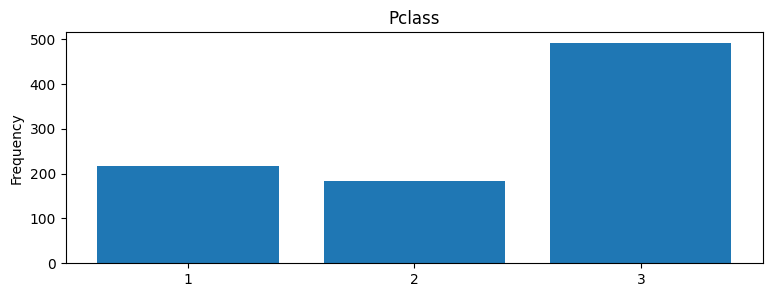

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


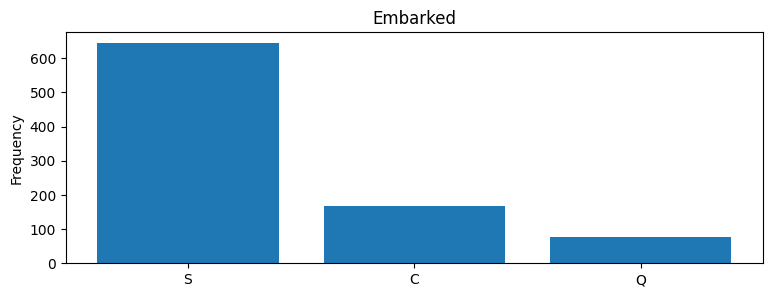

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


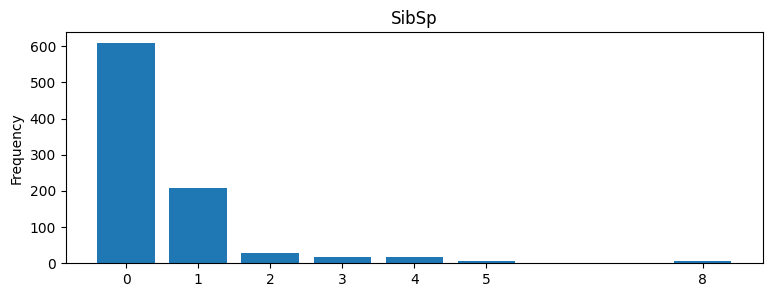

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


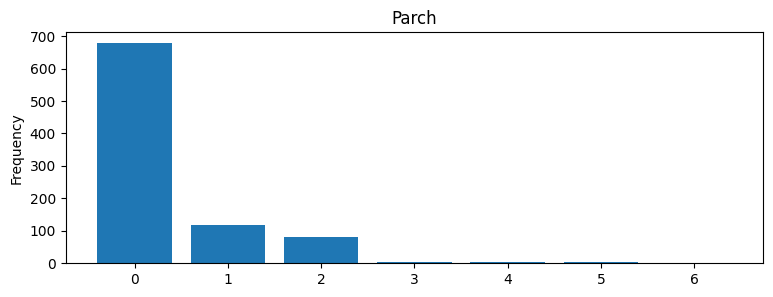

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [28]:
import matplotlib.pyplot as plt

def bar_plot(variable):
  '''
      input : variable  ex:'Sex'
      output : bar plot & value count
  '''
  # get feature
  var = train_df[variable]
  # count number of categorical variable(value/sample)
  varValue = var.value_counts()

  # visualize
  plt.figure(figsize = (9, 3))
  plt.bar(varValue.index, varValue)
  plt.xticks(varValue.index, varValue.index.values)
  plt.ylabel('Frequency')
  plt.title(variable)
  plt.show()
  print('{}: \n {}'.format(variable, varValue))

category1 = ['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
for c in category1:
  bar_plot(c)

In [29]:
category2 = ['Cabin', 'Name', 'Ticket']

for c in category2:
  print('{}: \n {}'.format(c, train_df[c].value_counts()))

Cabin: 
 Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64
Name: 
 Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Ticket: 
 Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtyp

###### 2.1.2 Numerical Variable

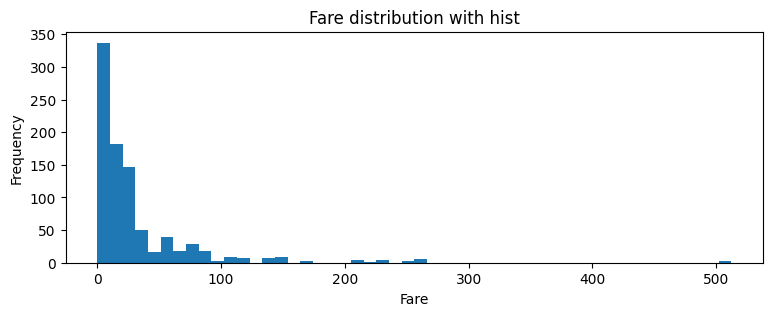

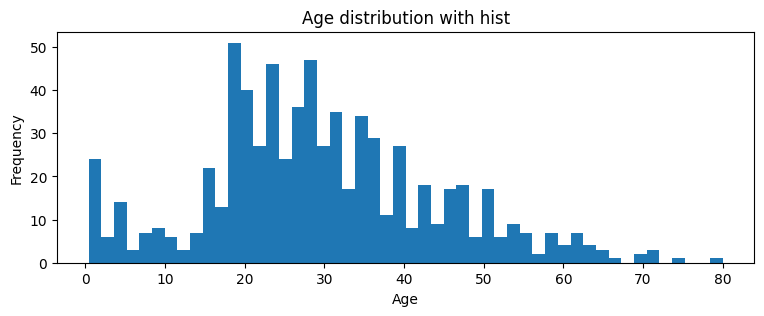

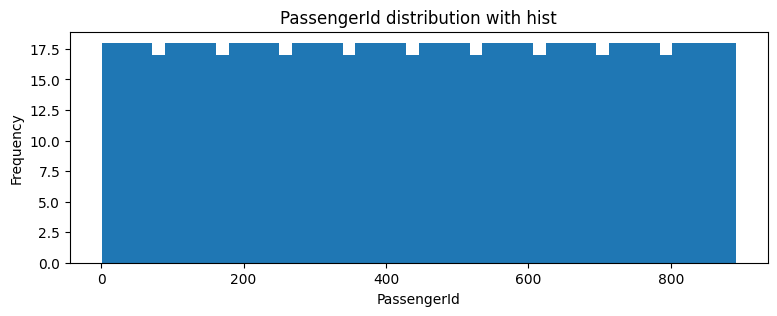

In [30]:
def plot_hist(variable):
    plt.figure(figsize = (9, 3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('{} distribution with hist'.format(variable))
    plt.show()

numericVar = ['Fare', 'Age', 'PassengerId']
for n in numericVar:
  plot_hist(n)

#### 3- Basic Data Analysis

In [31]:
# Pclass vs Survived
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [32]:
# Sex vs Survived
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [33]:
# Sibsp vs Survived
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [34]:
# Parch vs Survived
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### 4- Outlier Detection

In [35]:
def detect_outlier(df, features):
  outliner_indices = []

  for c in features:
    # 1st quartile
    Q1 = np.percentile(df[c], 25)

    # 3rd quartile
    Q3 = np.percentile(df[c], 75)

    # IQR
    IQR = Q3 - Q1

    # Outlier step
    outlier_step = IQR * 1.5

    # detect outlier and their indeces
    outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

    # store indeces
    outliner_indices.extend(outlier_list_col)

  outliner_indices = Counter(outliner_indices)
  multiple_outliers = list(i for i, v in outliner_indices.items() if v > 2)

  return multiple_outliers

In [36]:
train_df.loc[detect_outlier(train_df, ['Age', 'SibSp', 'Parch', 'Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S



#### 5- Missing Value


In [37]:
# Data frame length
train_df_len = len(train_df)

##### 5.1 Find Missing Value

In [38]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [39]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##### 5.2 Fill Missing Value

In [40]:
# train_df[train_df['Embarked'].isnull()]

In [41]:
# train_df.boxplot(column = 'Fare', by = 'Embarked')
# plt.show()

In [42]:
# train_df['Embarked'] = train_df['Embarked'].fillna('C')
# train_df[train_df['Embarked'].isnull()]

In [43]:
train_df[train_df['Fare'].isnull()]

# If it were a null value:
train_df['Fare'] = train_df['Fare'].fillna(np.mean(train_df[train_df['Pclass'] == 3]['Fare']))

In [44]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


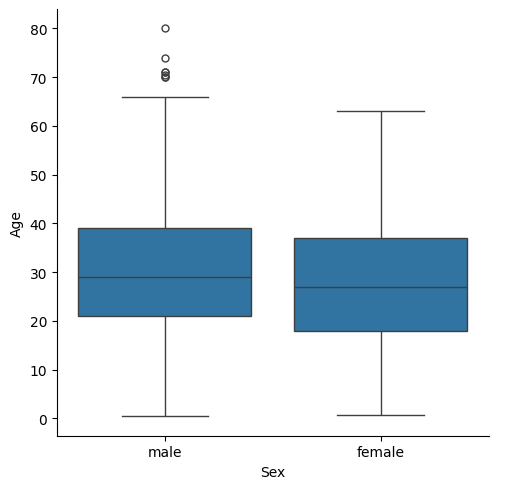

In [45]:
# Relationship between sex and age
sns.catplot(x = 'Sex', y = 'Age', data = train_df, kind = 'box')
plt.show()

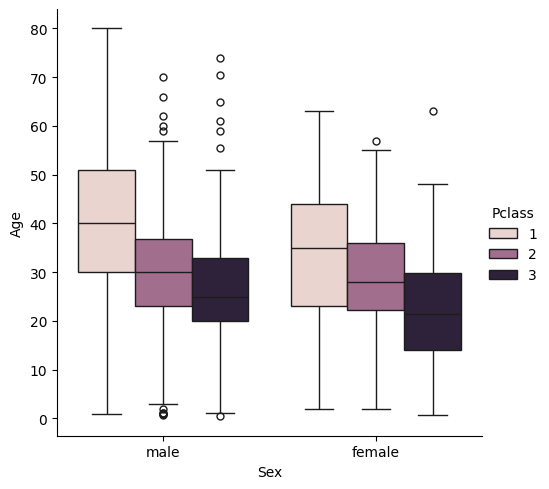

In [46]:
# Age, Sex and Pclass Analysis
sns.catplot(x = 'Sex', y = 'Age', hue = 'Pclass', data = train_df, kind = 'box')
plt.show()

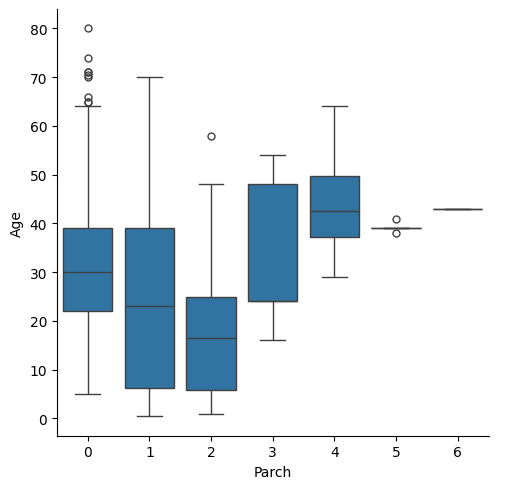

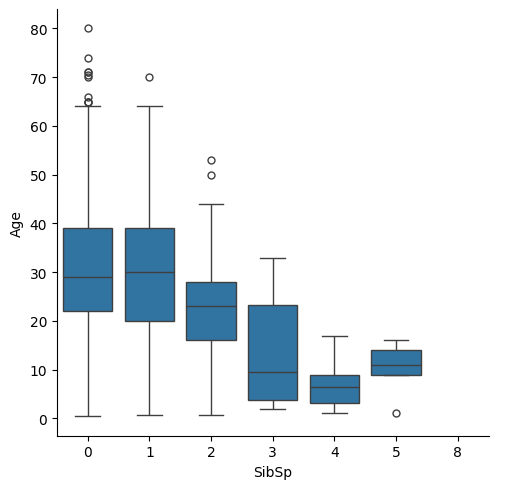

In [47]:
# Parch, SibSp and Age Analysis
sns.catplot(x = 'Parch', y = 'Age', data = train_df, kind = 'box')
sns.catplot(x = 'SibSp', y = 'Age', data = train_df, kind = 'box')
plt.show()

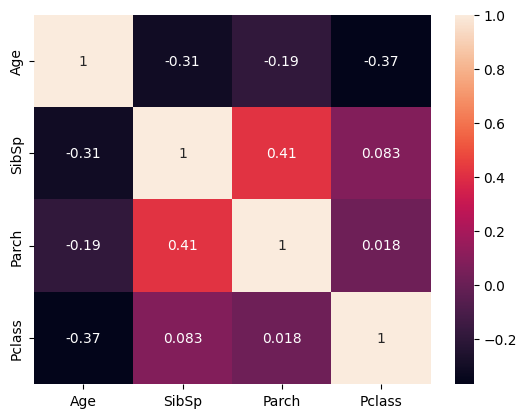

In [48]:
# Analysis of age correlation with others
sns.heatmap(train_df[['Age', 'SibSp', 'Parch', 'Pclass']].corr(), annot = True)
plt.show()

In [49]:
index_nan_age = list(train_df['Age'][train_df['Age'].isnull()].index)

for i in index_nan_age:
  age_pred = train_df['Age'][((train_df['SibSp'] == train_df.iloc[i]['SibSp']) & (train_df['Parch'] == train_df.iloc[i]['Parch']) & (train_df['Pclass'] == train_df.iloc[i]['Pclass']))].median()
  age_med = train_df['Age'].median()

  if not np.isnan(age_pred):
    train_df['Age'].iloc[i] = age_pred
  else:
    train_df['Age'].iloc[i] = age_med

In [50]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### 6- Visualization

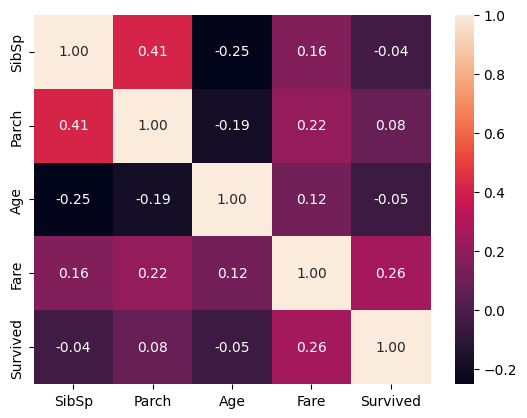

In [51]:
list1 = ['SibSp', 'Parch', 'Age', 'Fare', 'Survived']
sns.heatmap(train_df[list1].corr(), annot = True, fmt = '.2f')

plt.show()

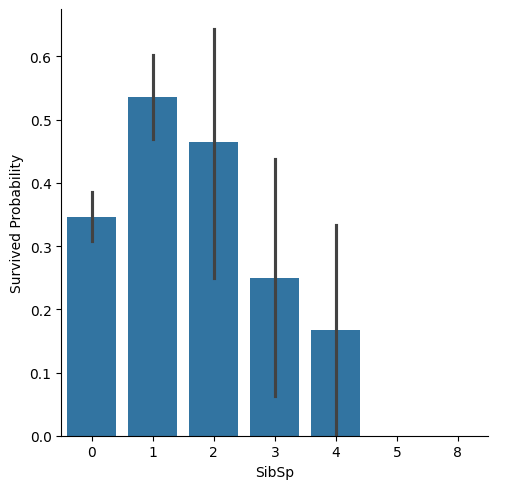

In [52]:
# SibSp vs Survived
g = sns.catplot(x = 'SibSp', y = 'Survived', data = train_df, kind = 'bar')
g.set_ylabels('Survived Probability')

plt.show()

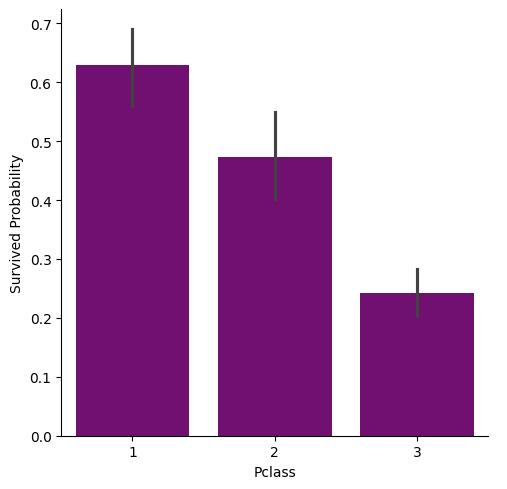

In [53]:
# Pclass vs Survived
g = sns.catplot(x = 'Pclass', y = 'Survived', data = train_df, kind = 'bar', color='purple')
g.set_ylabels('Survived Probability')

plt.show()

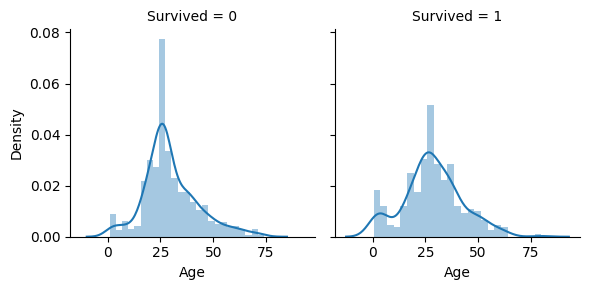

In [54]:
# Age vs Survived
g = sns.FacetGrid(train_df, col = 'Survived')
g.map(sns.distplot, 'Age', bins = 25)

plt.show()

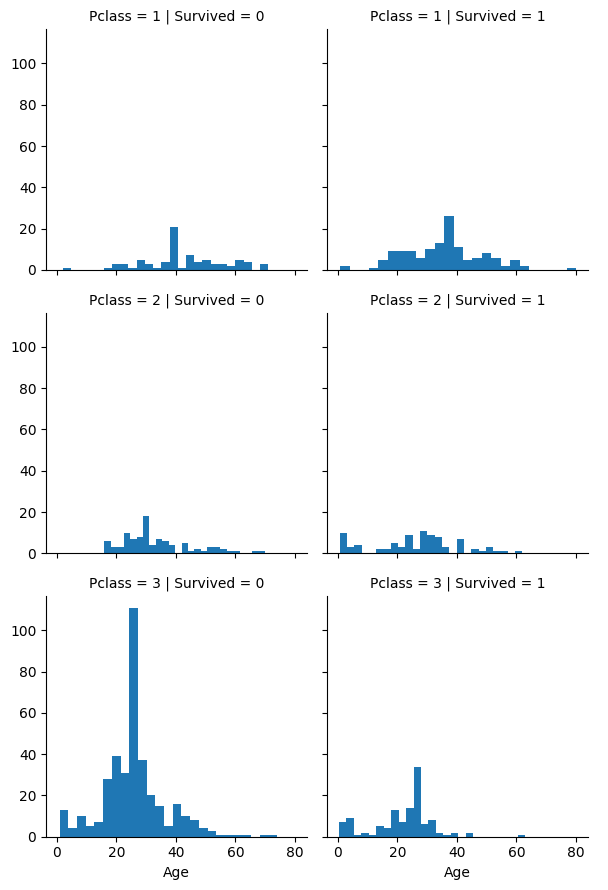

In [55]:
# Pclass - Survived - Age
g = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass')
g.map(plt.hist, 'Age', bins = 25)
g.add_legend()

plt.show()

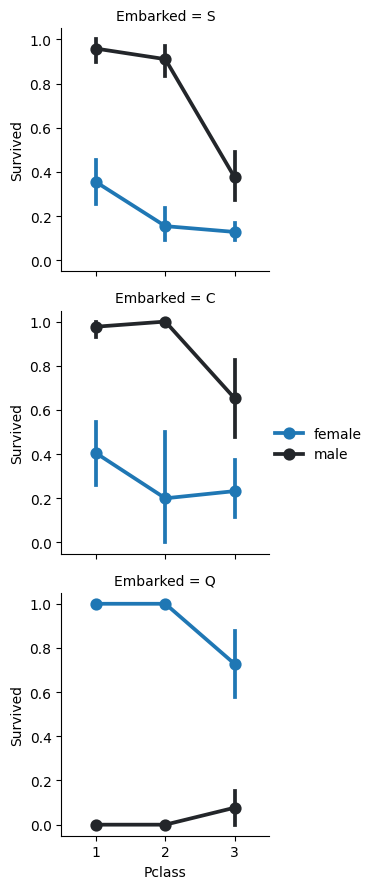

In [56]:
# Embarked - Sex - Pclass - Survived
g = sns.FacetGrid(train_df, row = 'Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
g.add_legend()

plt.show()

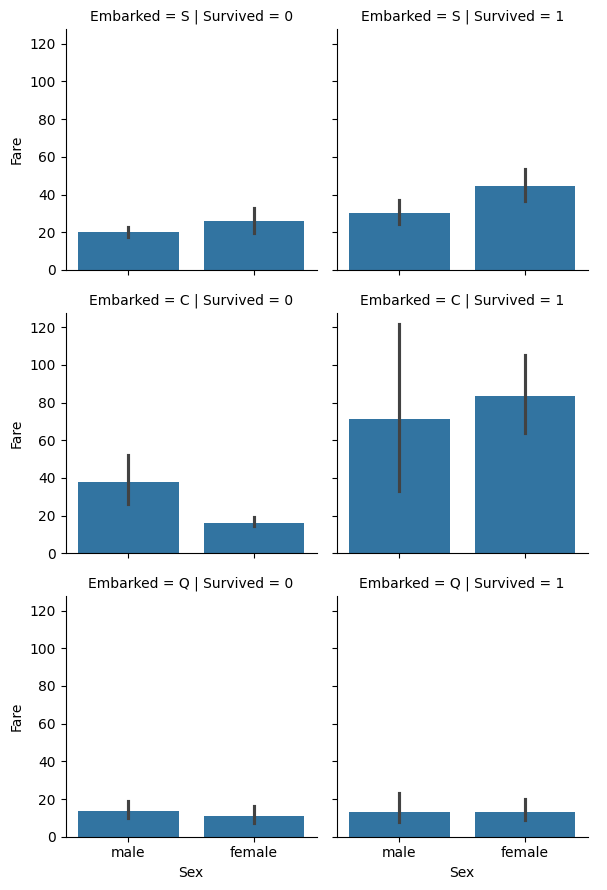

In [57]:
# Embarked - Sex - Fare - Survived
g = sns.FacetGrid(train_df, row = 'Embarked', col = 'Survived')
g.map(sns.barplot, 'Sex', 'Fare')
g.add_legend()

plt.show()

#### 7- Feature Engineering

In [58]:
# Name - Title
train_df['Name'].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [59]:
# Separating names from titles
name = train_df['Name']
train_df['Title'] = [i.split('.')[0].split(',')[-1].strip() for i in name]

In [60]:
train_df['Title'].head(10)

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


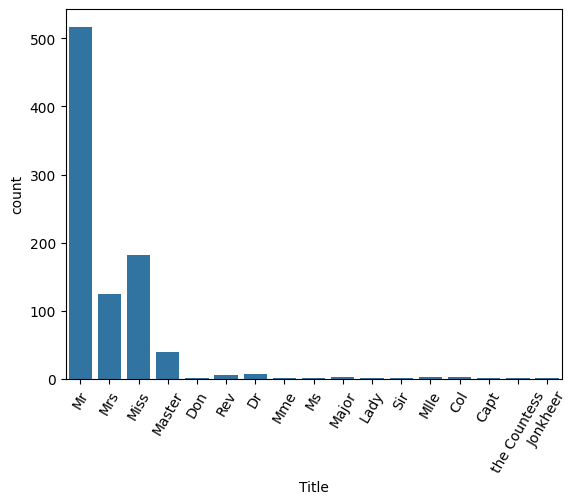

In [61]:
# Title count
sns.countplot(x = 'Title', data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [62]:
# convert to categorical
train_df['Title'] = train_df['Title'].replace(['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'other')
train_df['Title'] = [0 if i == 'Master' else 1 if i == 'Miss' or i == 'Ms' or i == 'Mlle' or i == 'Mrs' else 2 if i == 'Mr' else 3 for i in train_df['Title']]
train_df['Title']

,Title
0,2
1,1
2,1
3,1
4,2
...,...
886,3
887,1
888,1
889,2


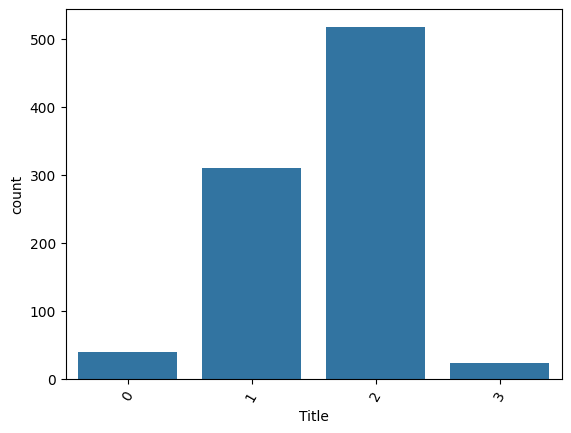

In [63]:
sns.countplot(x = 'Title', data = train_df)
plt.xticks(rotation = 60)
plt.show()

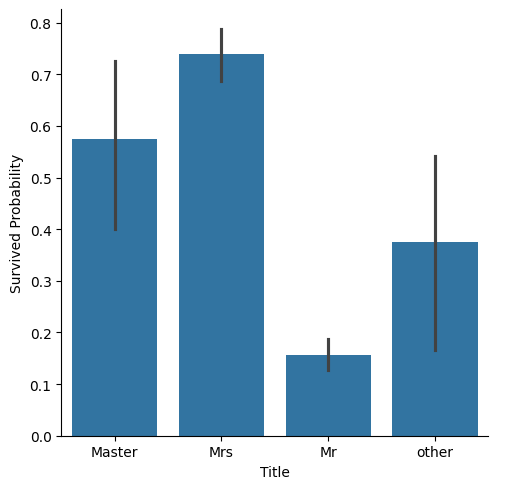

In [64]:
# Relationship between title and survived
g = sns.catplot(x = 'Title', y = 'Survived', data = train_df, kind = 'bar')
g.set_xticklabels(['Master', 'Mrs', 'Mr', 'other'])
g.set_ylabels('Survived Probability')

plt.show()

In [65]:
# Feature extraction
# Since we created the title feature, we can remove the name column from the dataset.
train_df.drop(labels = ['Name'], axis = 1, inplace = True)

In [66]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [67]:
# converting categorical variable to numerical variable
train_df = pd.get_dummies(train_df, columns = ['Title'])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [68]:
# Extracting Family Size(SibSp-Parch-Self) feature
train_df.head()
train_df['Fsize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


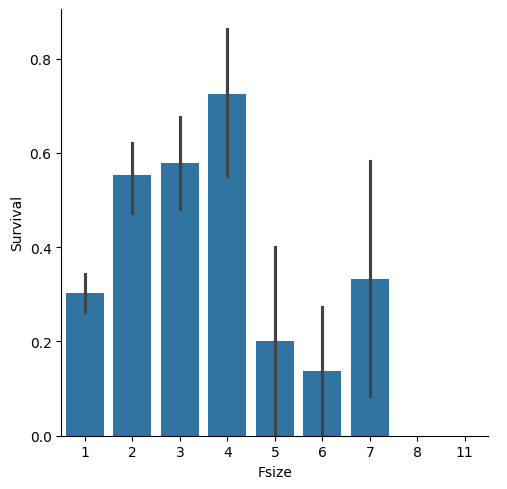

In [69]:
# Fsize vs Survived
g = sns.catplot(x = 'Fsize', y = 'Survived', data = train_df, kind = 'bar')
g.set_ylabels('Survival')

plt.show()

In [70]:
train_df['Family_Size'] = [1 if i < 5 else 0 for i in train_df['Fsize']]

train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,Family_Size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1
5,6,0,3,male,26.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,1
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,False,False,True,False,1,1
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,True,False,False,False,5,0
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,False,True,False,False,3,1
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,False,2,1


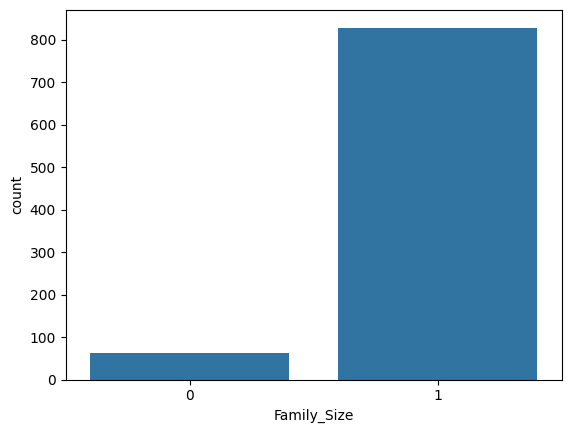

In [71]:
sns.countplot(x = 'Family_Size', data = train_df)
plt.show()

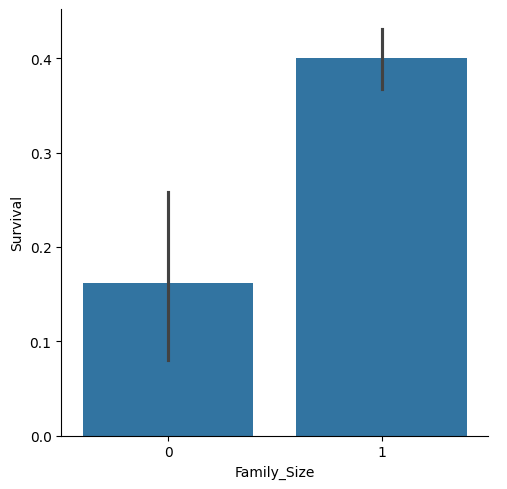

In [72]:
g = sns.catplot(x = 'Family_Size', y = 'Survived', data = train_df, kind = 'bar')
g.set_ylabels('Survival')

plt.show()

In [73]:
train_df = pd.get_dummies(train_df, columns = ['Family_Size'])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,Family_Size_0,Family_Size_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


In [74]:
train_df = pd.get_dummies(train_df, columns = ['Embarked'])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,Family_Size_0,Family_Size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


In [75]:
train_df['Ticket'].head(20)

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
5,330877
6,17463
7,349909
8,347742
9,237736


In [76]:
a = 'A/5. 2151'
a.replace('.', '').replace('/', '').strip().split(' ')[0]

'A5'

In [77]:
tickets = []
for i in list(train_df.Ticket):
  if not i.isdigit():
    tickets.append(i.replace('.', '').replace('/', '').strip().split(' ')[0])
  else:
    tickets.append('X')

train_df['Ticket'] = tickets

In [78]:
train_df['Ticket'].head(20)

,Ticket
0,A5
1,PC
2,STONO2
3,X
4,X
5,X
6,X
7,X
8,X
9,X


In [79]:
train_df = pd.get_dummies(train_df, columns = ['Ticket'], prefix = 'T')
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X
0,1,0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,False,True,False,False,False,False
3,4,1,1,female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True
5,6,0,3,male,26.0,0,0,8.4583,NaN,False,...,False,False,False,False,False,False,False,False,False,True
6,7,0,1,male,54.0,0,0,51.8625,E46,False,...,False,False,False,False,False,False,False,False,False,True
7,8,0,3,male,2.0,3,1,21.0750,NaN,True,...,False,False,False,False,False,False,False,False,False,True
8,9,1,3,female,27.0,0,2,11.1333,NaN,False,...,False,False,False,False,False,False,False,False,False,True
9,10,1,2,female,14.0,1,0,30.0708,NaN,False,...,False,False,False,False,False,False,False,False,False,True


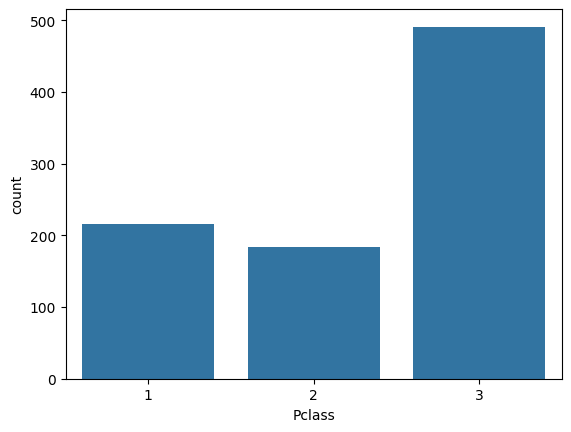

In [80]:
sns.countplot(x = 'Pclass', data = train_df)
plt.show()

In [81]:
train_df['Pclass'] = train_df['Pclass'].astype('category')
train_df = pd.get_dummies(train_df, columns = ['Pclass'])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,female,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1,female,26.0,0,0,7.9250,NaN,False,True,...,False,False,True,False,False,False,False,False,False,True
3,4,1,female,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0,male,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


In [82]:
train_df['Sex'] = train_df['Sex'].astype('category')
train_df = pd.get_dummies(train_df, columns = ['Sex'])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_X,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1,26.0,0,0,7.9250,NaN,False,True,False,...,True,False,False,False,False,False,False,True,True,False
3,4,1,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


In [83]:
# Feature extraction
# Dropping Fsize, PassengerId, Cabin
train_df.drop(labels = ['Fsize', 'PassengerId', 'Cabin'], axis = 1, inplace = True)

train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Family_Size_0', 'Family_Size_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA',
       'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP', 'T_PPP',
       'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_X', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

#### 8- Modeling

In [84]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

##### 8.1 Train - Test Split

In [85]:
train_df_len = len(train_df)
train = train_df[:train_df_len]
X_train = train.drop(labels = ['Survived'], axis = 1)
y_train = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print('X_train', len(X_train))
print('X_test', len(X_test))
print('y_train', len(y_train))
print('y_test', len(y_test))

X_train 596
X_test 295
y_train 596
y_test 295


##### 8.2 Simple Logistic Regression

In [86]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2)
acc_log_test = round(logreg.score(X_test, y_test)*100,2)
print('Training Accuracy: % {}'.format(acc_log_train))
print('Testing Accuracy: % {}'. format(acc_log_test))

Training Accuracy: % 82.55
Testing Accuracy: % 83.73


##### 8.3 Hyperparameter Tuning - Grid Search - Cross Validation
    Choosing Best Parameter

In [97]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
              SVC(random_state = random_state),
              RandomForestClassifier(random_state = random_state),
              LogisticRegression(random_state = random_state),
              KNeighborsClassifier()]

dt_param_grid = {'min_samples_split' : range(10, 500, 20),
                 'max_depth' : range(1, 20, 2)}

svc_param_grid = {'kernel' : ['rbf'],
                  'gamma' : [0.001, 0.01, 0.1, 1],
                  'C' : [1, 10, 50, 100, 200, 300, 1000]}

rf_param_grid = {'max_features' : [1, 3, 10],
                 'min_samples_split' : [2, 3, 10],
                 'min_samples_leaf' : [1, 3, 10],
                 'bootstrap' : [False],
                 'n_estimators' : [100, 300],
                 'criterion' : ['gini']}

logreg_param_grid = {'C' : np.logspace(-3, 3, 7),
                     'penalty' : ['l1', 'l2']}

knn_param_grid = {'n_neighbors' : np.linspace(1, 19, 10, dtype = int).tolist(),
                  'weights' : ['uniform', 'distance'],
                  'metric' : ['euclidean', 'manhattan']}

classifier_param = [dt_param_grid,
                    svc_param_grid,
                    rf_param_grid,
                    logreg_param_grid,
                    knn_param_grid]

In [108]:
cv_results = []
best_estimators = []

for i in range(len(classifier)):
  clf = GridSearchCV(classifier[i], param_grid = classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = 'accuracy', n_jobs = -1, verbose = 1)  # n_jobs: If a parallel operation is to be performed, it uses as many processors as possible. / verbose: Shows the transactions that occur within GridSearchCV
  clf.fit(X_train, y_train)
  cv_results.append(clf.best_score_)
  best_estimators.append(clf.best_estimator_)
  print(cv_results[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.818728813559322
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8071186440677967
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.827231638418079
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8221751412429379
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7869209039548023


In [109]:
cv_results = pd.DataFrame({'Cross Validation Accuracy Means' : cv_results, 'ML Models' : ['Decision Tree', 'Support Vector Machine', 'Random Forest', 'Logistic Regression', 'K Nearest Neighbor']})
cv_results

,Cross Validation Accuracy Means,ML Models
0,0.818729,Decision Tree
1,0.807119,Support Vector Machine
2,0.827232,Random Forest
3,0.822175,Logistic Regression
4,0.786921,K Nearest Neighbor


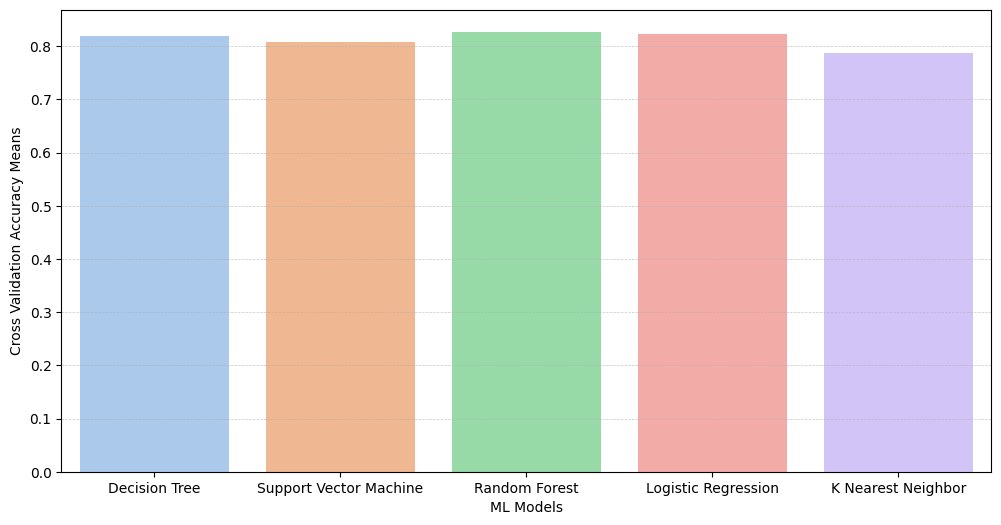

In [110]:
plt.figure(figsize=(12, 6))

s = sns.barplot( x = 'ML Models', y = 'Cross Validation Accuracy Means', data = cv_results,palette='pastel')

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

##### 8.4 Ensemble Modeling

In [111]:
votingC = VotingClassifier(estimators = [('dt', best_estimators[0]), ('rfc', best_estimators[2]), ('lr', best_estimators[3])], voting = 'soft', n_jobs = -1)

votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test), y_test))

0.8101694915254237


### Linear Regression

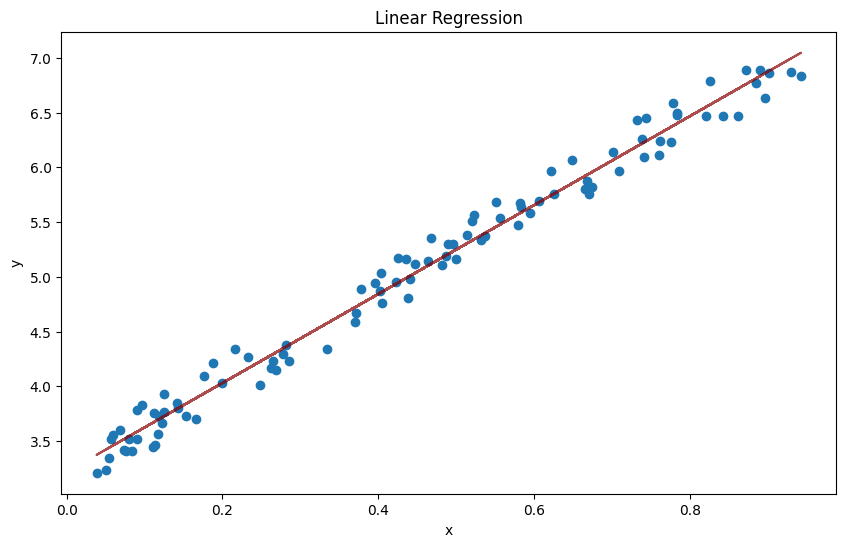

a0:  3.2183846013899258
a1:  4.0585867805867055


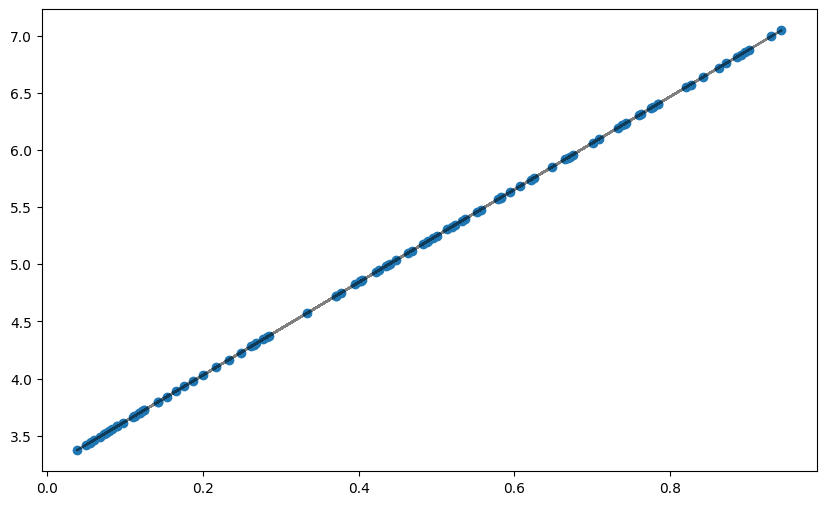

In [139]:
# Creating Dataset
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100, 1)
y = 3 + 4 * X + 0.5 * np.random.rand(100, 1)

# plt.scatter(X, y)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

plt.figure(figsize = (10, 6))
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), color = 'darkred', alpha = 0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

# y = 3+4x --> y = a0 + a1x

# a0 = lin_reg.coef_[0]
# print('a0: ', a0)

a0 = lin_reg.intercept_[0]
print('a0: ', a0)

a1 = lin_reg.coef_[0][0]
print('a1: ', a1)

for i in range(100):
  y_ = a0 + a1 * X

plt.figure(figsize = (10, 6))
plt.plot(X, y_, color = 'black', alpha = 0.5)
plt.scatter(X, y_)

MSE:  2548.07239872597
R2:  0.47257544798227147


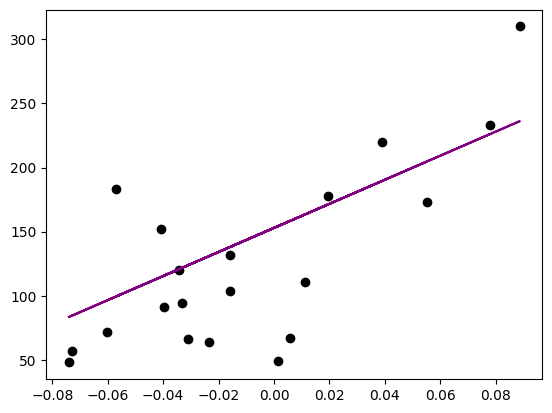

In [158]:
# Dataset Training
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import matplotlib.pyplot as plt

diabetes = load_diabetes()

# X = diabetes.data
# y = diabetes.target
diabetes_X, diabetes_y = load_diabetes(return_X_y = True)

diabetes_X = diabetes_X[:, np.newaxis, 2]

# Train - Test Split
diabetes_X_train = diabetes_X[:-20] # Added all data into train dataset except last 20
diabetes_X_test = diabetes_X[-20:] # Added last 20 data into test dataset

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

lin_reg = LinearRegression()
lin_reg.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = lin_reg.predict(diabetes_X_test)

mse = mean_squared_error(diabetes_y_test, diabetes_y_pred)
print('MSE: ', mse)

r2 = r2_score(diabetes_y_test, diabetes_y_pred)
print('R2: ', r2)

plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'purple')

#### Multi Variable Linear Regression

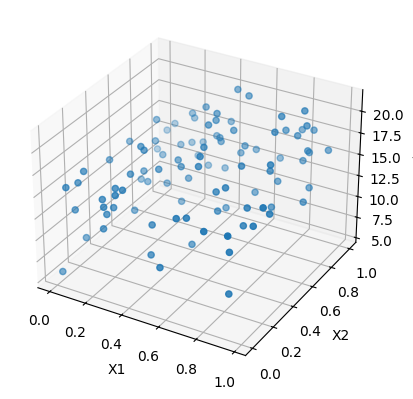

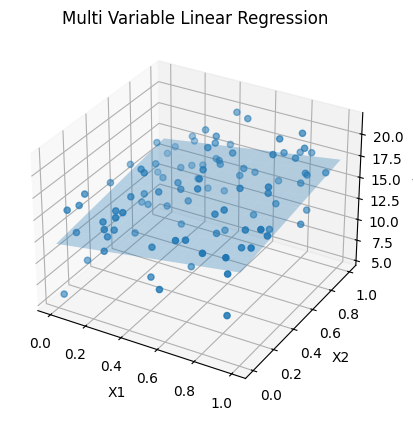

Coefficients:  [3.10282895 2.26627857]
Intercept:  11.997852239428472


In [181]:
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

# y = a0 + a1x --> linear regression
# y = a0 + a1x1 + a2x2 + ... + anxn --> multi variable linear regression

# Creating Dataset --> y = a0 + a1x1 + a2x2
X = np.random.rand(100, 2)
coef = np.array([3, 5])
# y = 0 + np.dot(X, coef) # without noise
y = 5 + 10*np.random.rand(100) + np.dot(X, coef) # added bias + noise

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.show()

# Training
lin_reg = LinearRegression()
lin_reg.fit(X, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

x1, x2 = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
y_pred = lin_reg.predict(np.array([x1.flatten(), x2.flatten()]).T)
ax.plot_surface(x1, x2, y_pred.reshape(x1.shape), alpha = 0.3)
plt.title('Multi Variable Linear Regression')
plt.show()

print('Coefficients: ', lin_reg.coef_)
print('Intercept: ', lin_reg.intercept_)

In [186]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

# rmse = mean_squared_error(y_test, y_pred, squared=False) is same with;
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

RMSE:  53.85344583676593


### Polynomial Regression

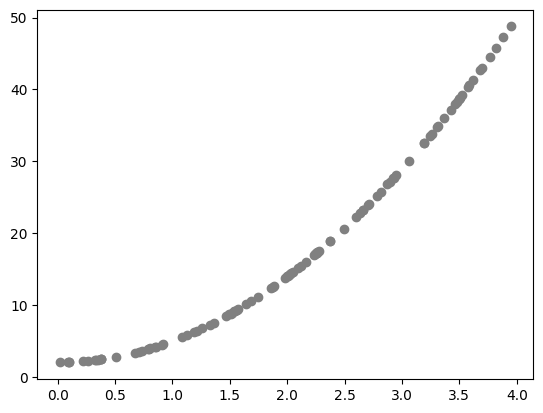

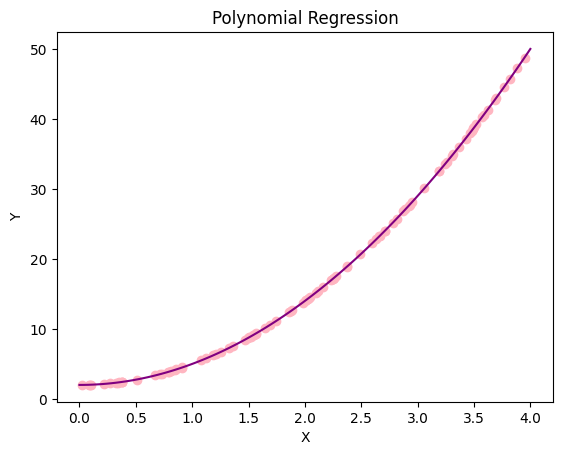

In [199]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

X = 4 * np.random.rand(100, 1)  # 1 vector
y = 2 + 3 * X**2  # y = 2 + 3x^2

plt.scatter(X, y, color = 'gray')
plt.show()

poly_feat = PolynomialFeatures(degree = 2)  # degree=2 because we created quadratic equation.
X_poly = poly_feat.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

plt.scatter(X, y, color = 'lightpink')
X_test = np.linspace(0, 4, 100).reshape(-1, 1)
X_test_poly = poly_feat.transform(X_test)
y_pred = poly_reg.predict(X_test_poly)
plt.plot(X_test, y_pred, color = 'purple')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.show()

### Practice on California Housing Dataset

In [203]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()

X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

poly_feat = PolynomialFeatures(degree = 2)
X_train_poly = poly_feat.fit_transform(X_train)
X_test_poly = poly_feat.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Polynomial Regression rmse: ', rmse)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Multi Variable Linear Regression rmse: ', rmse)

Polynomial Regression rmse:  0.6813967465119813
Multi Variable Linear Regression rmse:  0.7455813830127749
